In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Timely data of warnings based on hours

## First we will see overal data using heat map.

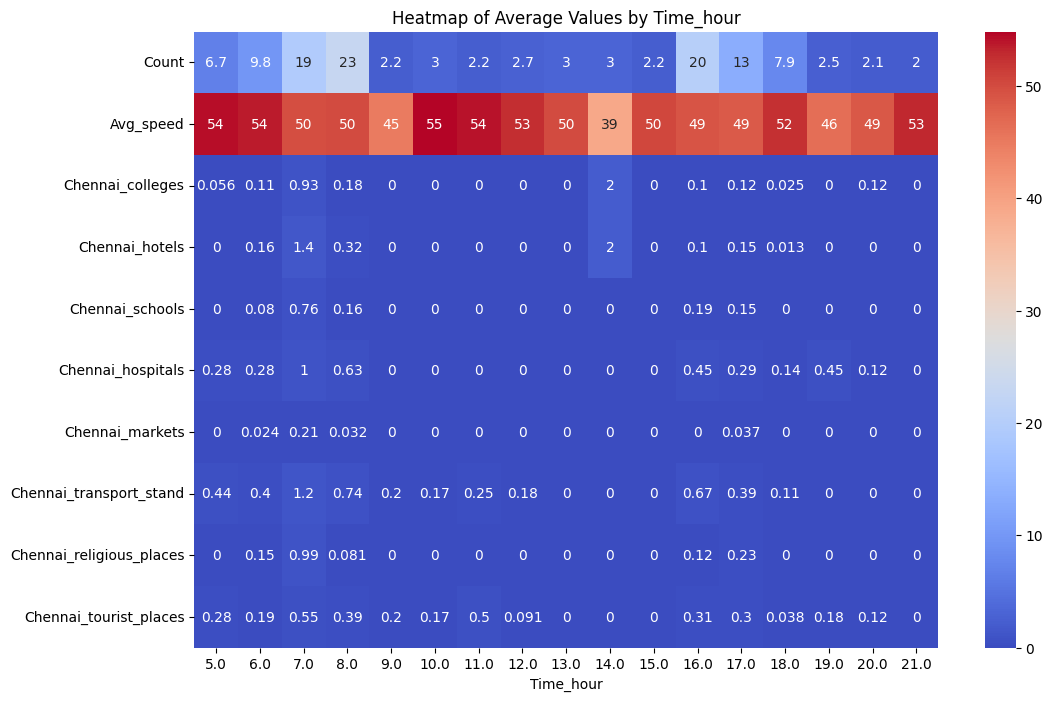

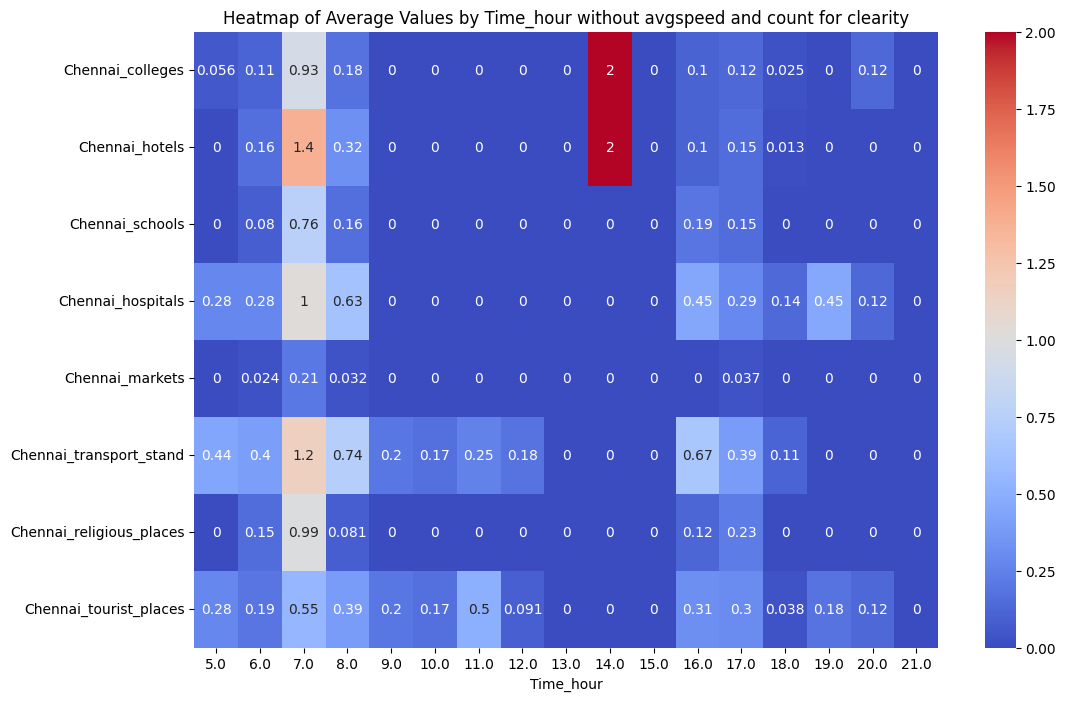

In [4]:

df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Time basis\alert concenteration hourly with places count\cas_ldw.csv")
# Drop the "Lat" and "Long" columns
df = df.drop(["Lat", "Long"], axis=1)

# Group the data by 'Time_hour' and calculate the mean for each group
grouped_df = df.groupby('Time_hour').mean()
# Transpose the DataFrame to have 'Time_hour' on the y-axis
grouped_df = grouped_df.T


# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by Time_hour")

# Show the plot
plt.show()


grouped_df = grouped_df.drop(["Count", "Avg_speed"], axis=0)

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by Time_hour without avgspeed and count for clearity")

# Show the plot
plt.show()


data is available from 5 a.m. to 21 p.m.
5 -9 a.m. to 16-19 p.m. frequency more, this beacuse bus operate in that time mostly, so this is just for bus.
average speed is too high this clearly show its a highway or good road.
7 to 9a.m. more warnings and 16 to 18 p.m. morw warnings here relatively average speed is less and chennai places are comming this means it is comming in cities and highway area.
high speed high warnings means it is overtaking by changeing the lane without signal etc.
and relatively low speed and warning more this means crowd increase and condition of curve entery, outskirts road merge with highway like conditions.
In morning relatively avg speed is more compare to evening for ldw warning, why is this indicating crowd is more in evening. or something else.

## Now we will see contribution of places in each hours in warning.

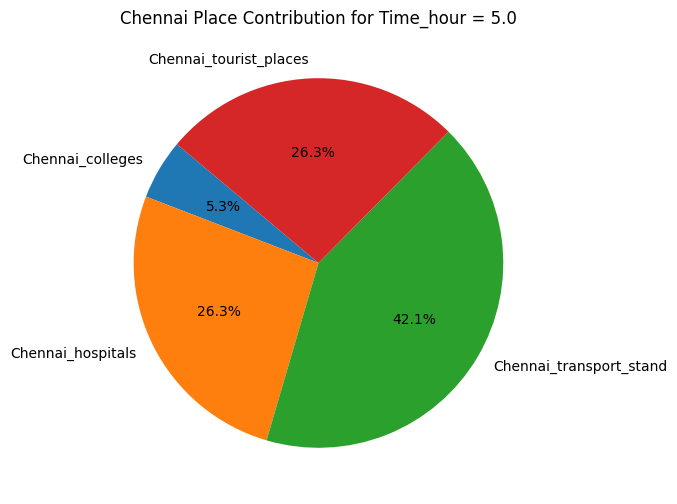

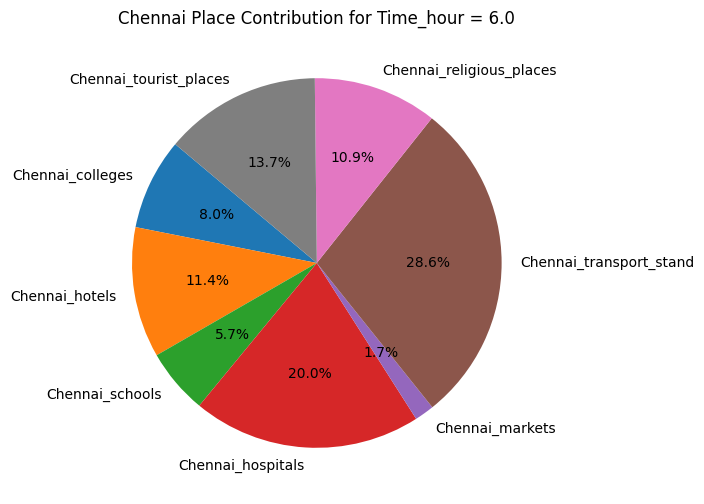

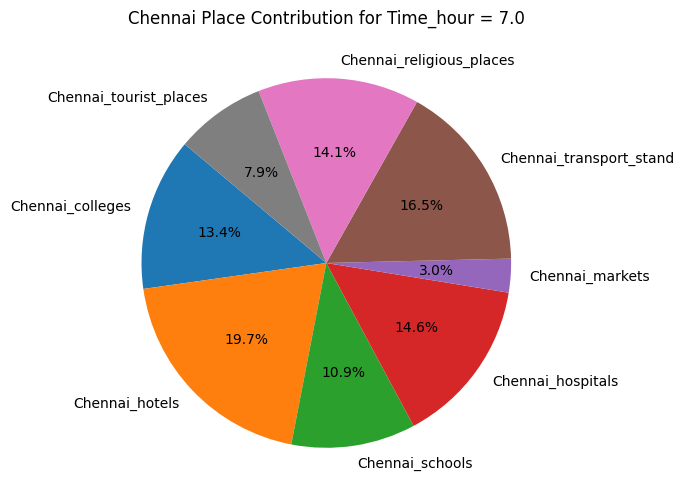

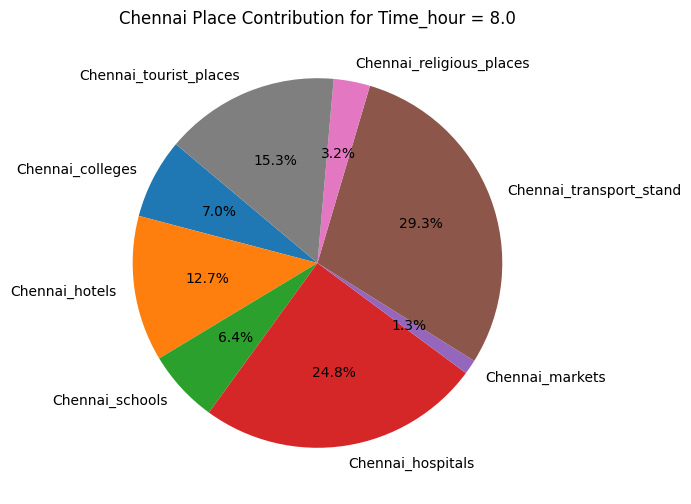

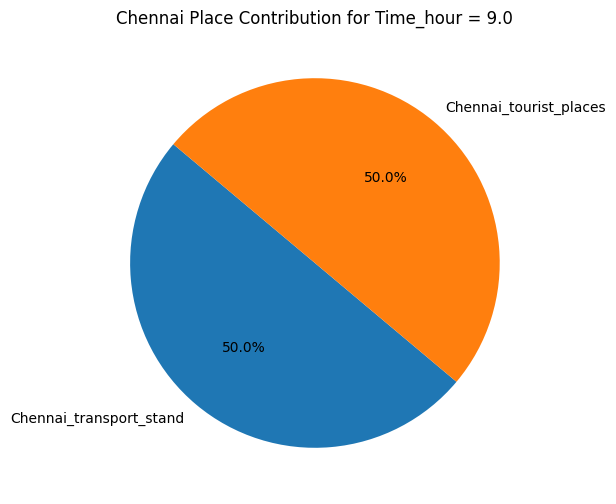

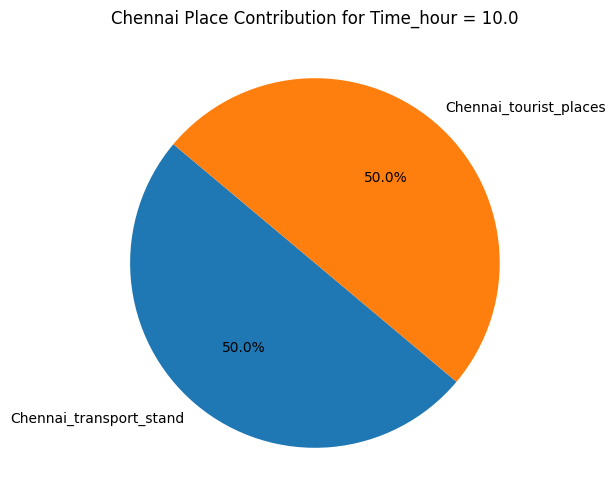

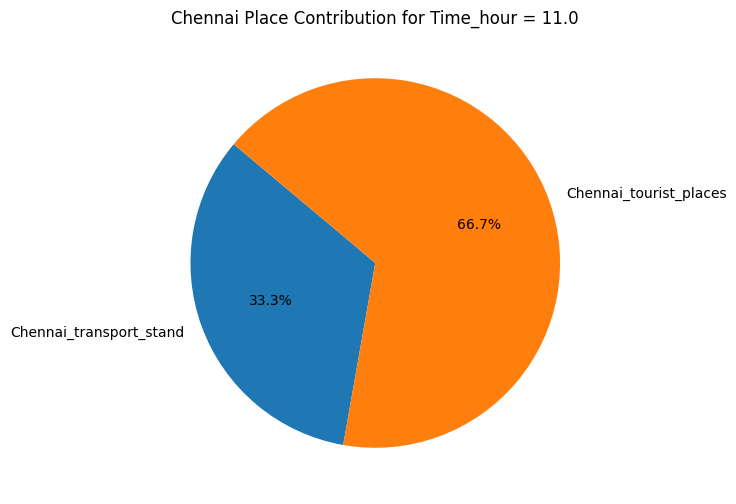

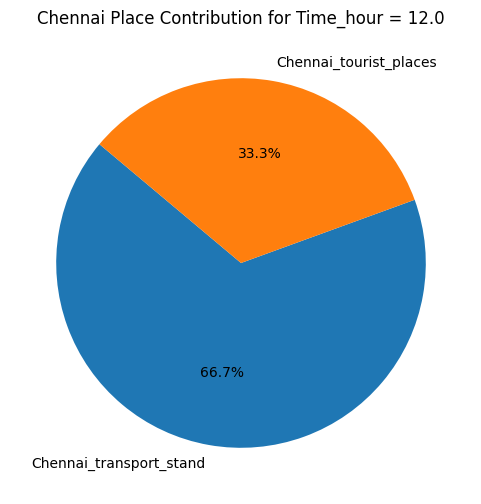

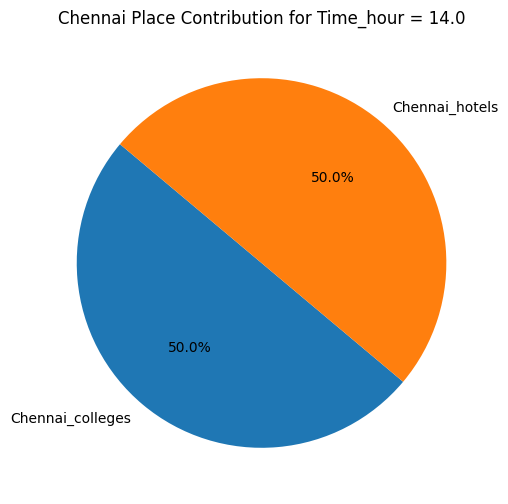

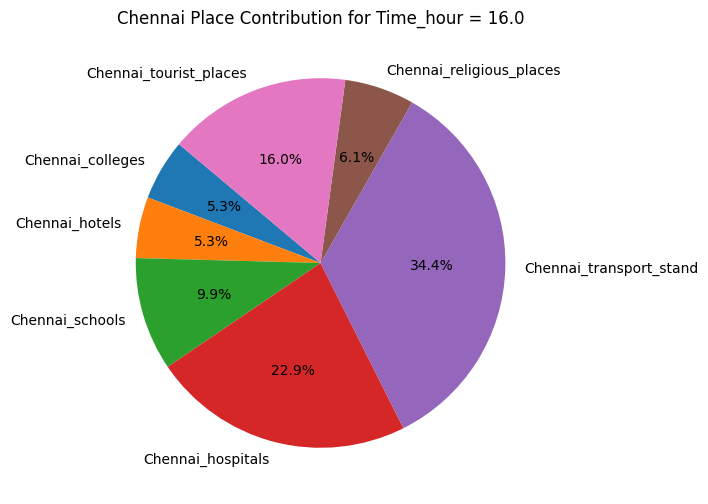

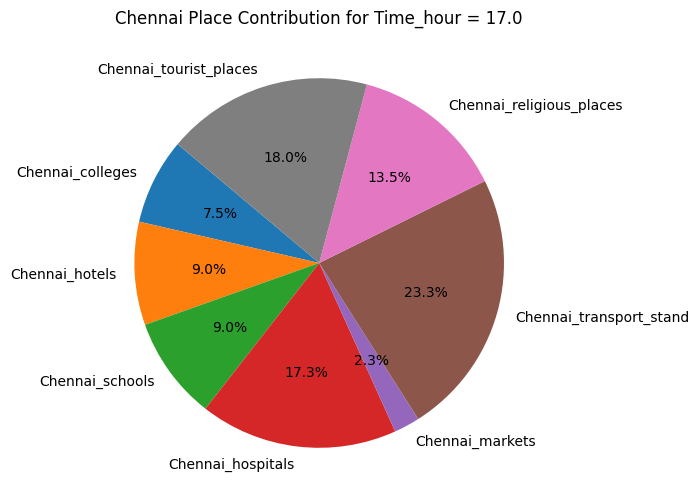

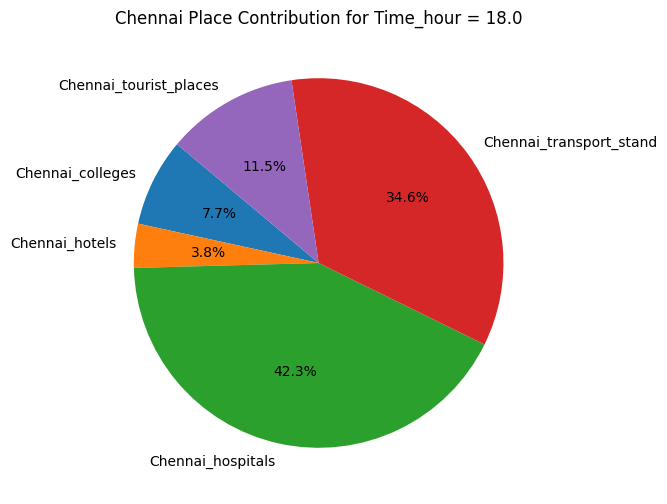

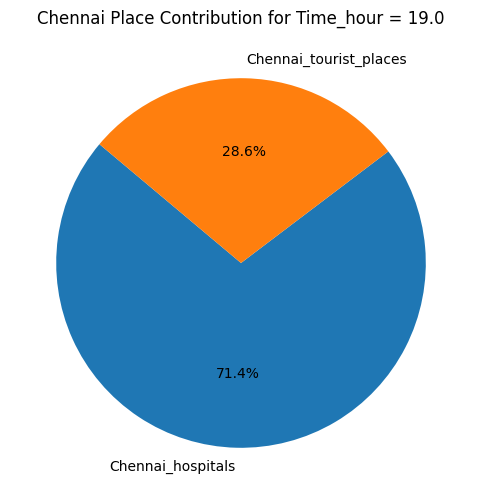

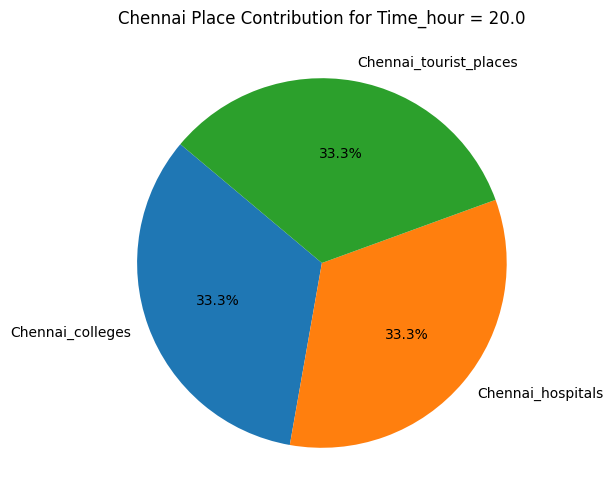

In [3]:


# Load your DataFrame from the CSV file
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Time basis\alert concenteration hourly with places count\cas_ldw.csv")

# Drop the "Lat" and "Long" columns, as well as columns 'Count' and 'Avg_speed'
df = df.drop(["Lat", "Long", "Count", "Avg_speed"], axis=1)

# Group the data by 'Time_hour' and calculate the sum for each group
grouped_df = df.groupby('Time_hour').sum()

# Calculate the total for each 'Time_hour' group
grouped_df['Total'] = grouped_df.sum(axis=1)

# Iterate through 'Time_hour' values and create pie charts only if any percentage is greater than 0
for time_hour, row in grouped_df.iterrows():
    chennai_places = row[:-1]  # Exclude the last column, which is the 'Total'
    total = row['Total']
    
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    # Check if any percentage is greater than 0
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for Time_hour = {time_hour}")
        plt.show()


# Weekday seperated data of warnings for ldw

In [4]:
df=pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with weekday\cas_ldw.csv")
df=df[df["Weekday"]=="Sunday"]
print(df)

        Alert        Date      Time        Lat       Long  Vehicle  Speed  \
5321  cas_ldw  2022-08-14  06:46:39  12.891129  80.084947     5339     57   
5322  cas_ldw  2022-08-14  06:49:05  12.908520  80.097776     5339     52   
5323  cas_ldw  2022-08-14  06:50:38  12.915916  80.104989     5339     56   
5324  cas_ldw  2022-08-14  06:51:21  12.918407  80.108939     5339     40   
5325  cas_ldw  2022-08-14  07:02:37  12.958944  80.144570     5339     50   
5326  cas_ldw  2022-08-14  07:05:01  12.974228  80.154377     5339     60   
5327  cas_ldw  2022-08-14  07:07:52  12.986139  80.174193     5339     52   
5328  cas_ldw  2022-08-14  07:10:29  12.996498  80.189758     5339     53   
5329  cas_ldw  2022-08-14  07:10:55  12.999553  80.193525     5339     58   
5330  cas_ldw  2022-08-14  07:11:06  12.999553  80.193525     5339     58   
5331  cas_ldw  2022-08-14  07:14:56  13.008494  80.210307     5339     50   
5332  cas_ldw  2022-08-14  07:24:28  13.033765  80.244244     5339     46   

same bus runs one day in sunday.

## see percent contribution of places on sunday.

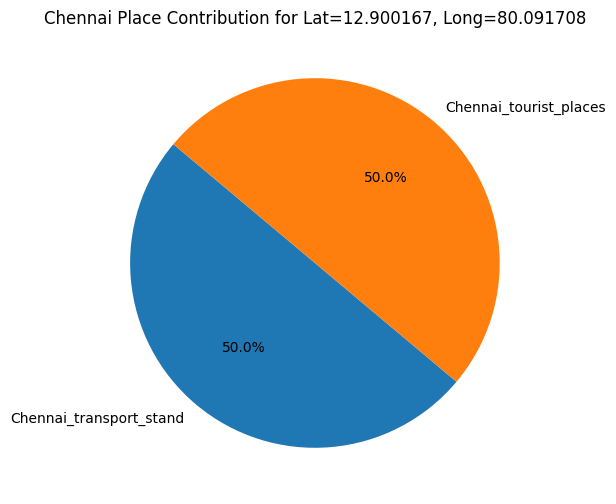

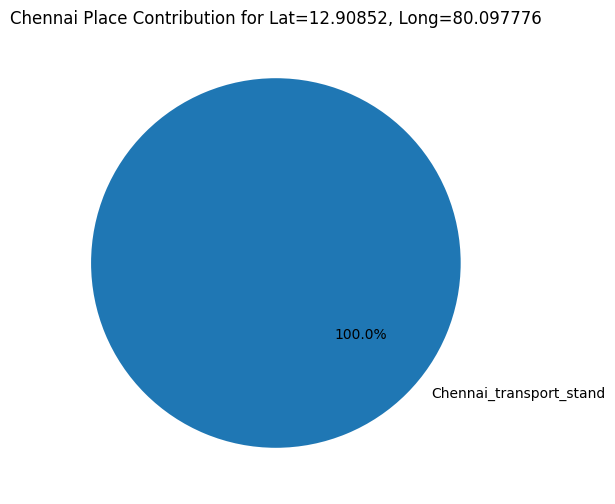

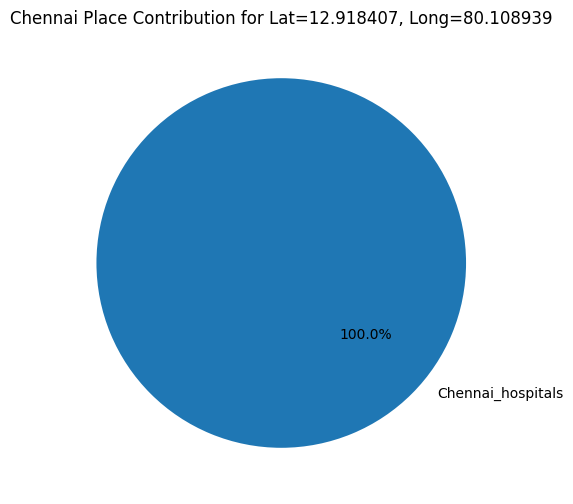

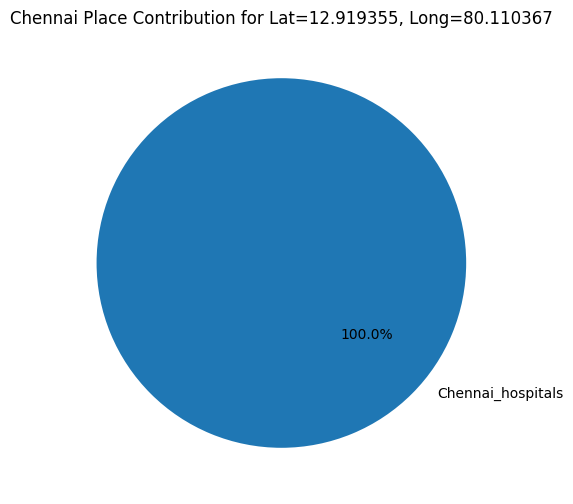

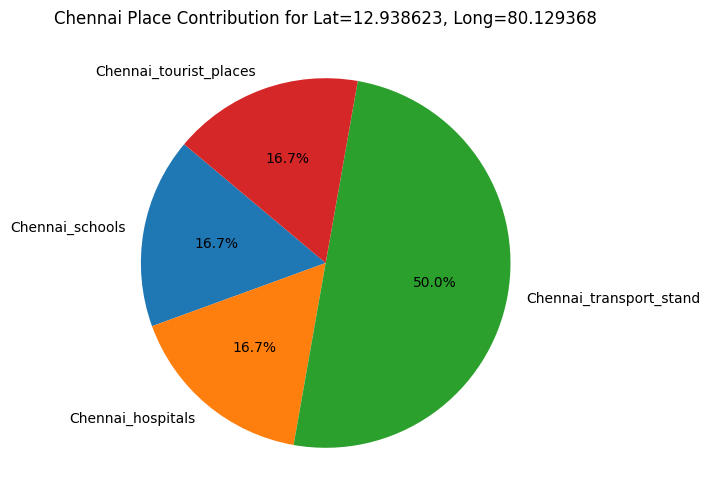

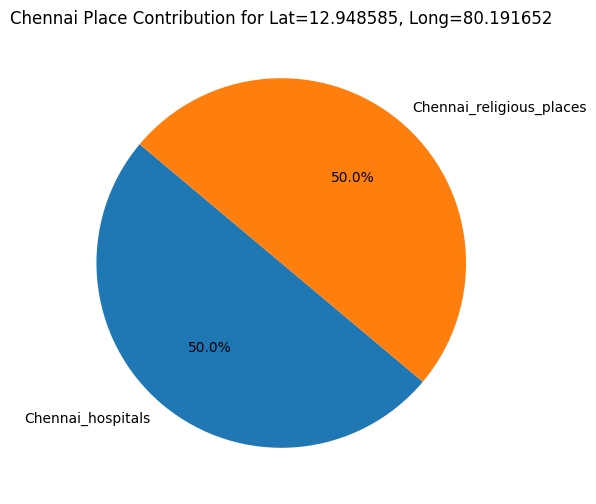

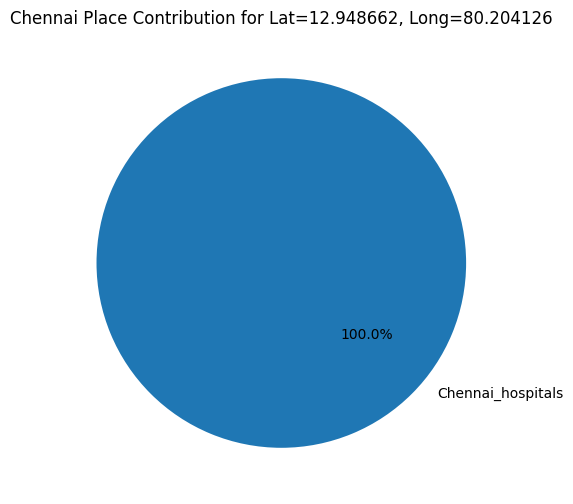

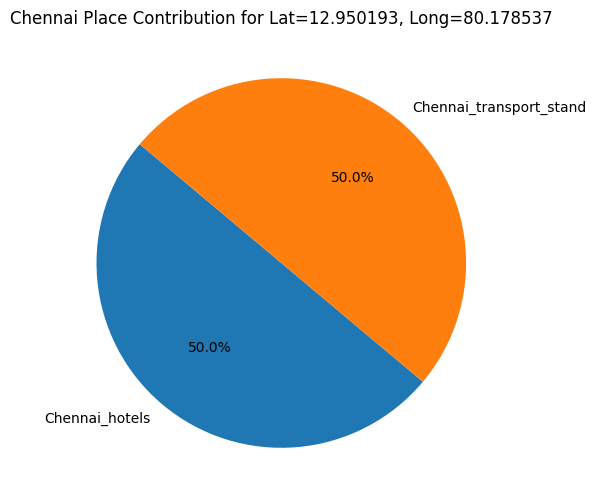

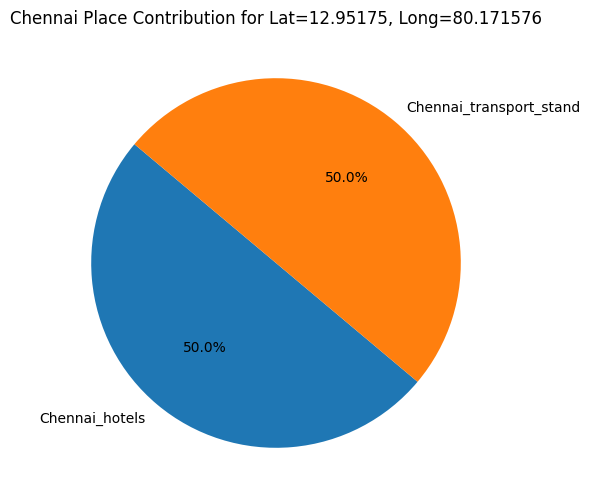

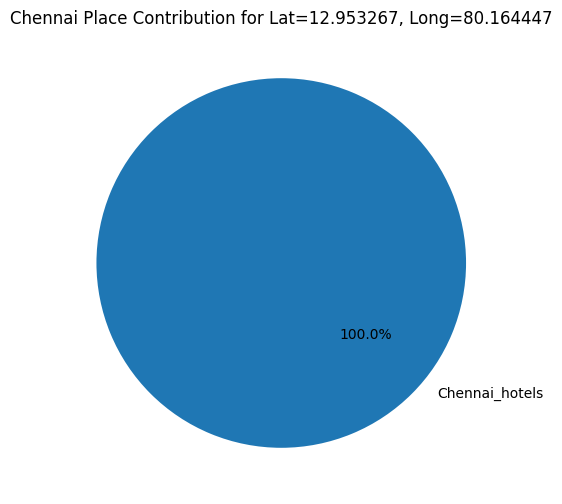

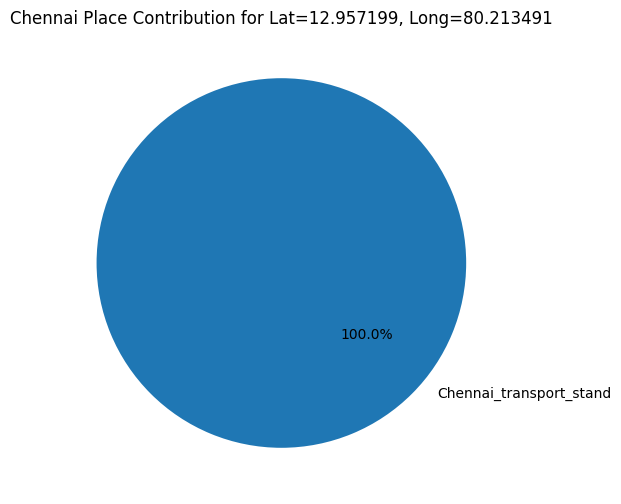

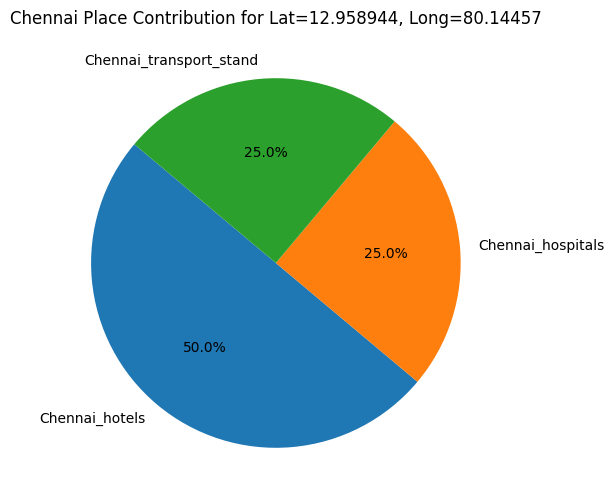

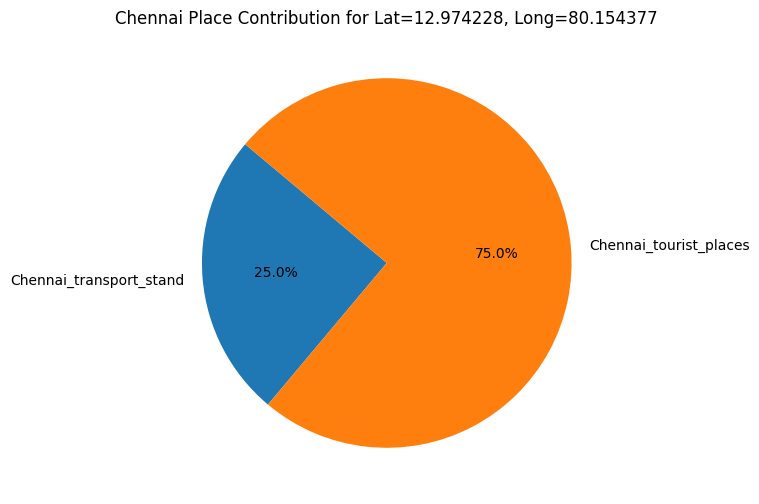

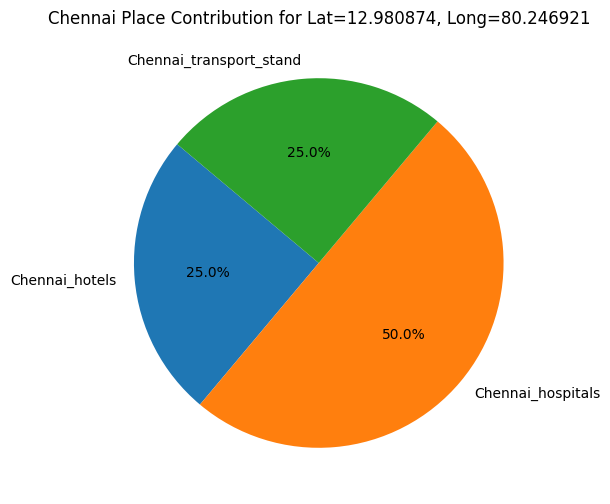

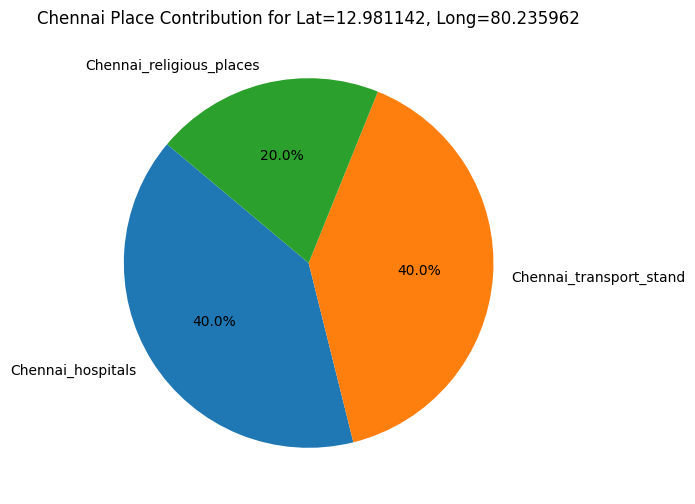

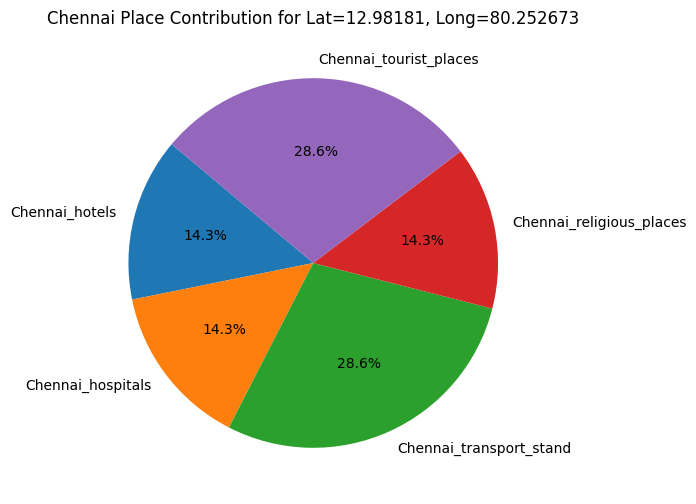

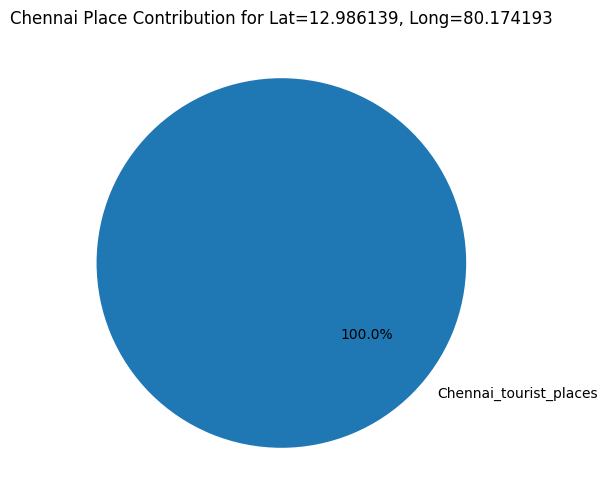

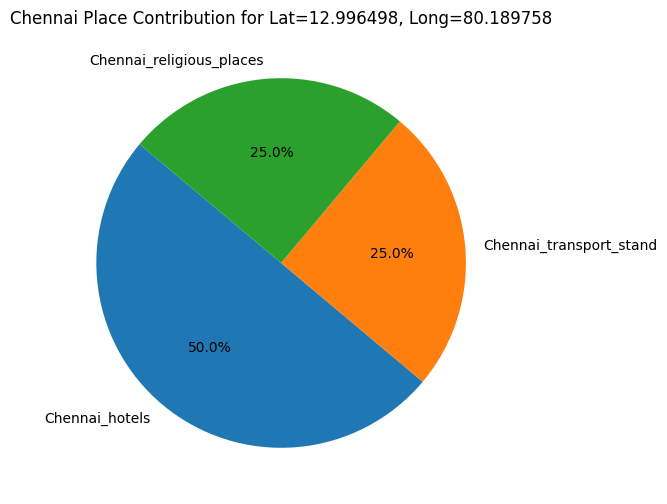

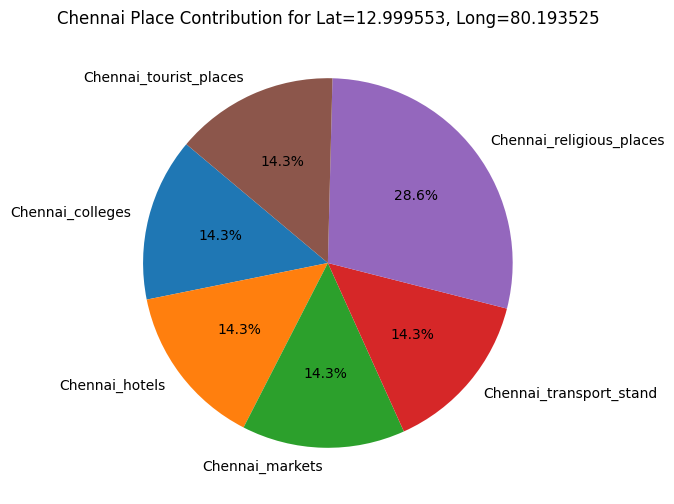

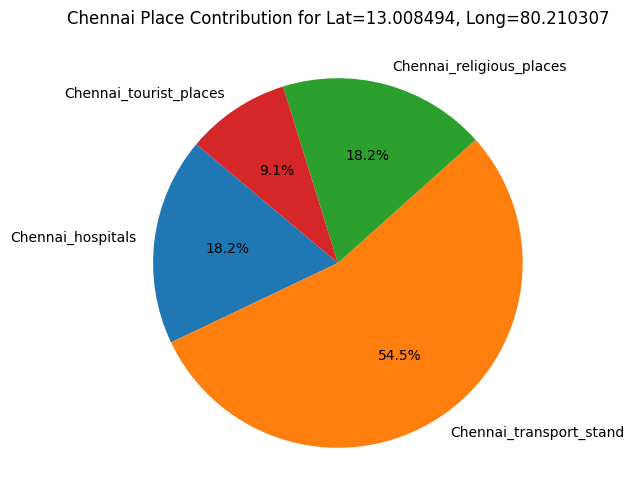

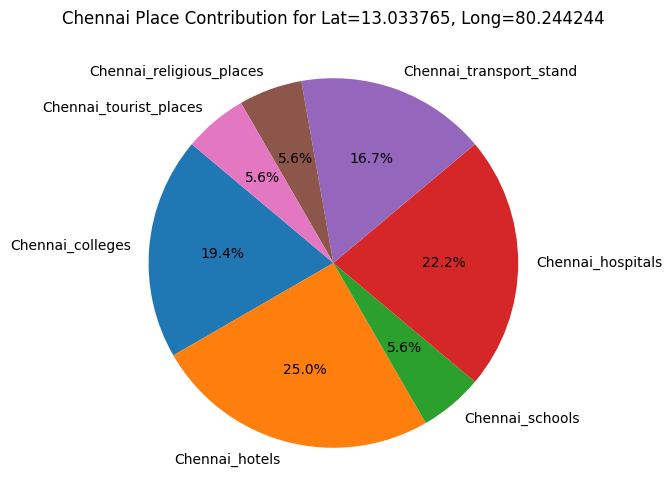

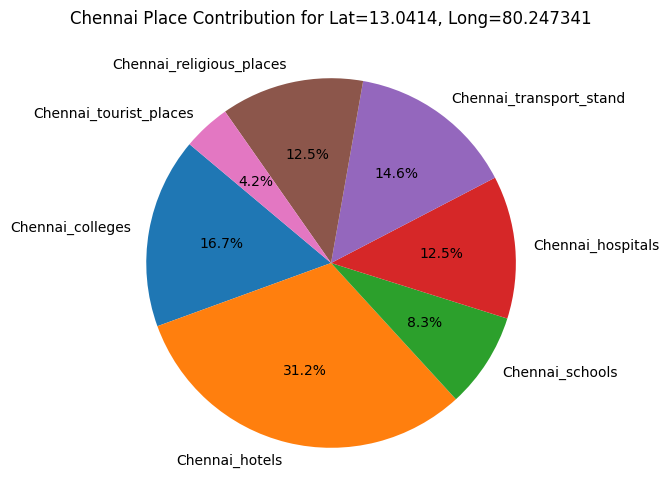

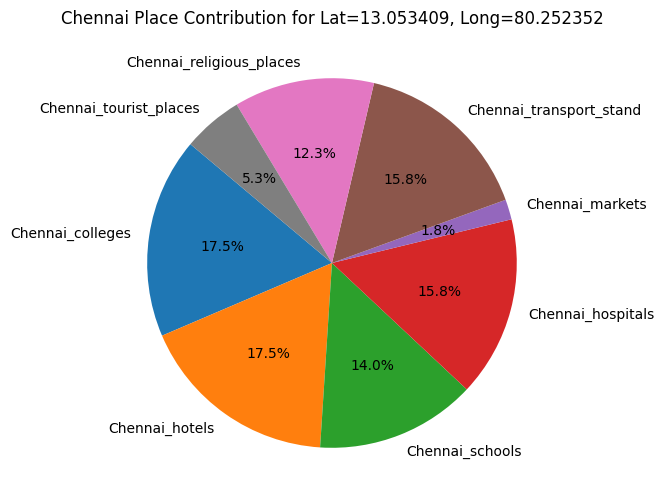

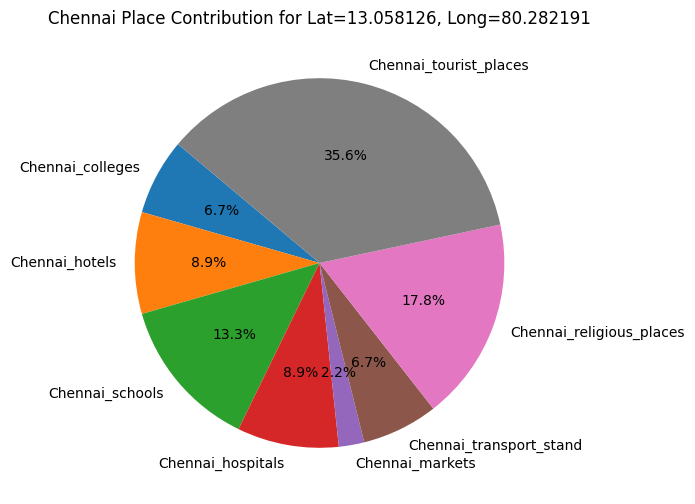

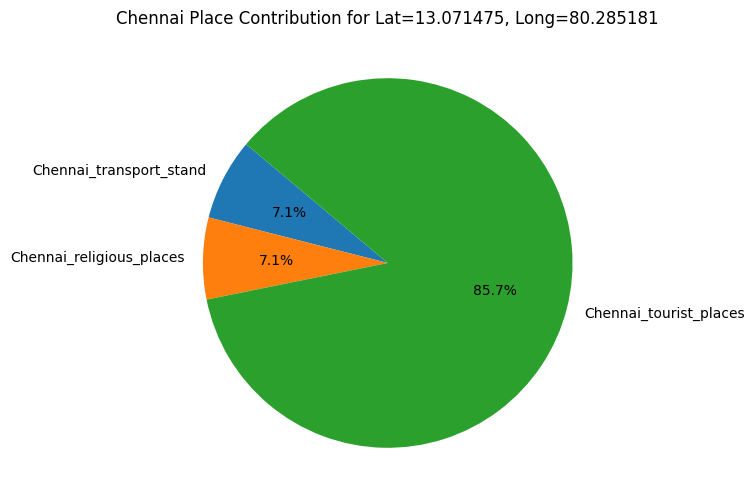

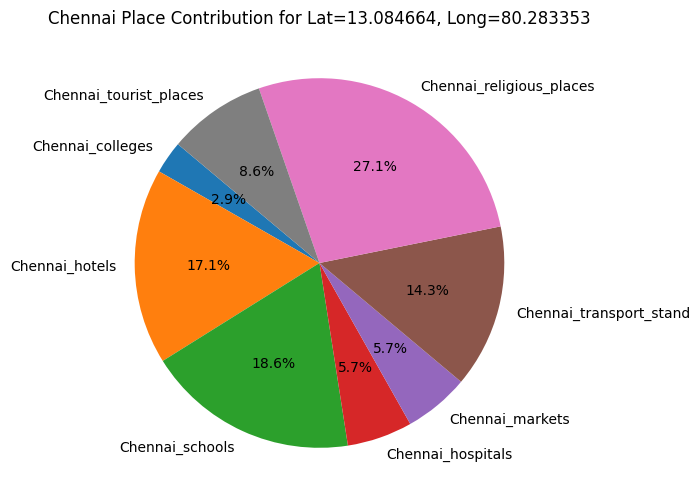

In [5]:
# Load your DataFrame from the CSV file
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\sunday seperated\sundayas_ldw.csv")

# Drop columns you don't need for this analysis
df = df.drop(["Alert", "Date", "Time", "Vehicle", "Speed", "Weekday"], axis=1)

# Group the data by latitude and longitude and calculate the sum for each group
grouped_df = df.groupby(["Lat", "Long"]).sum()

# Calculate the total for each combination
grouped_df["Total"] = grouped_df.sum(axis=1)

# Iterate through combinations and create pie charts only if there are nonzero percentages
for index, row in grouped_df.iterrows():
    chennai_places = row[:-1]  # Exclude the last column, which is the 'Total'
    total = row["Total"]
    
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    # Check if any percentage is greater than 0
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for Lat={index[0]}, Long={index[1]}")
        plt.show()


overall this shows it is moving in chennai streets and it is confirmed by the co-ordinates in map.

##  Compare data weekday using heatmap.

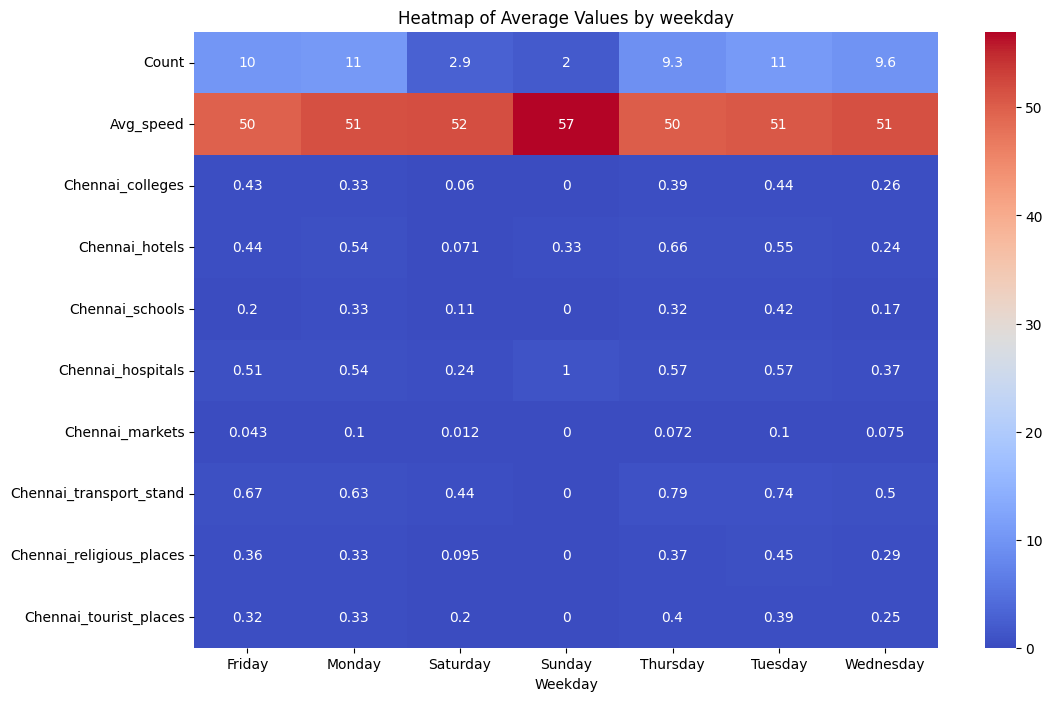

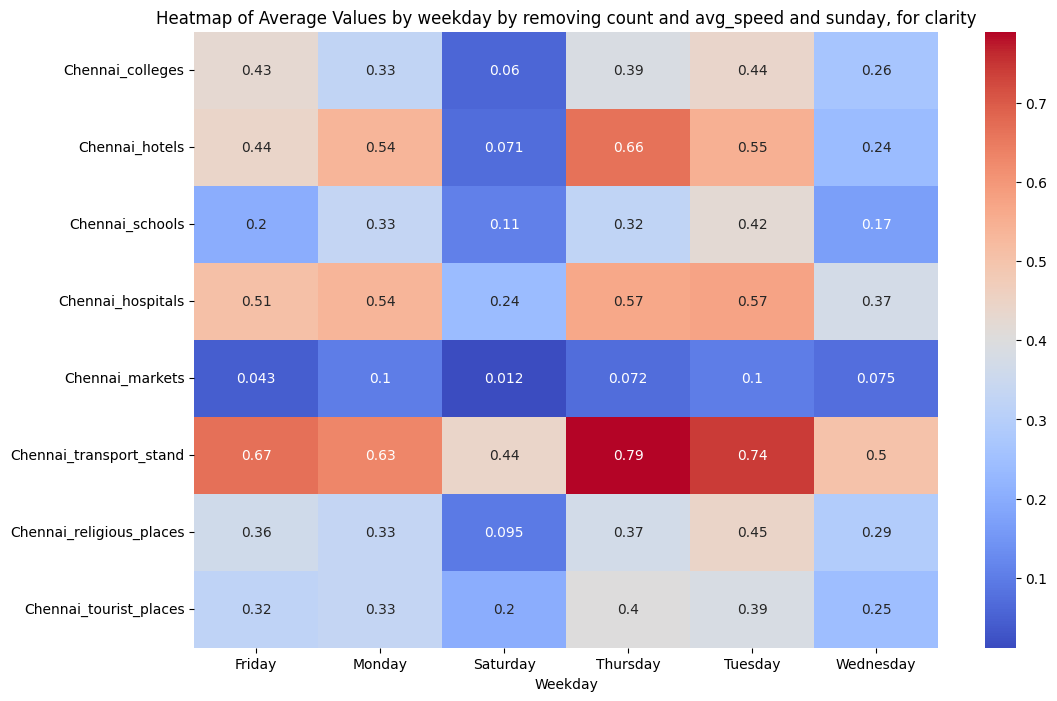

In [6]:

df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with concenteration of warning each weekday with chennai places\cas_ldw.csv")
# Drop the "Lat" and "Long" columns
df = df.drop(["Lat", "Long"], axis=1)

# Group the data by 'Time_hour' and calculate the mean for each group
grouped_df = df.groupby('Weekday').mean()
# Transpose the DataFrame to have 'Time_hour' on the y-axis
grouped_df = grouped_df.T


# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by weekday")

# Show the plot
plt.show()

grouped_df = grouped_df.drop(["Count", "Avg_speed"], axis=0)
grouped_df = grouped_df.drop(["Sunday"], axis=1)
# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by weekday by removing count and avg_speed and sunday, for clarity")

# Show the plot
plt.show()

In [12]:

df=pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with weekday\cas_ldw.csv")
total=df.shape[0]
wed_num=df[df["Weekday"]=="Wednesday"].shape[0]
# how much percent data is from wednessday.
print((wed_num*100)/total)


6431
1207
18.768465246462448


transport stand ke pass jada kyuki, waha crowd of vehicle is more.
wedness ka data equal concenteration me hai but, least concenteraion hai data ka jaha chennai places hai.this is of ldw warnig why?
this data of warning is periodic i.e. in that overall area this much warnings can come severy weekday if you follow same route, but not on wednessday. ek bar standard deviation nikal lena sabka. then kehna.

## See contribution of places in each weekday. 

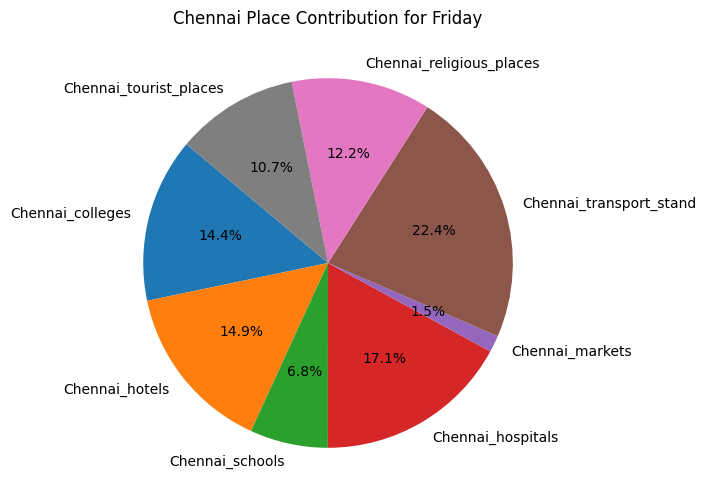

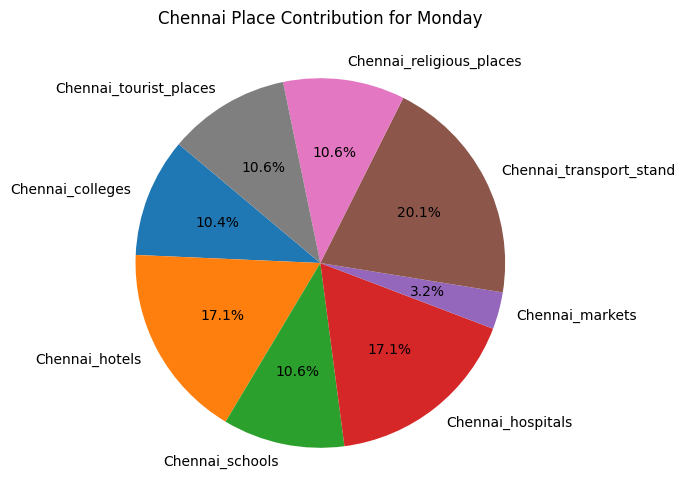

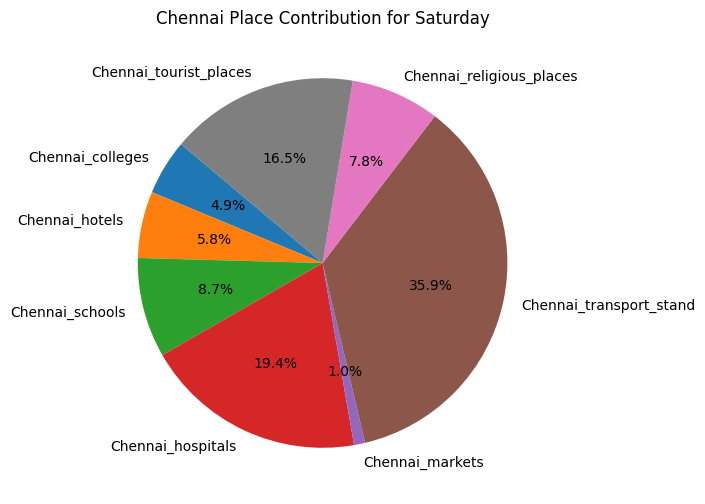

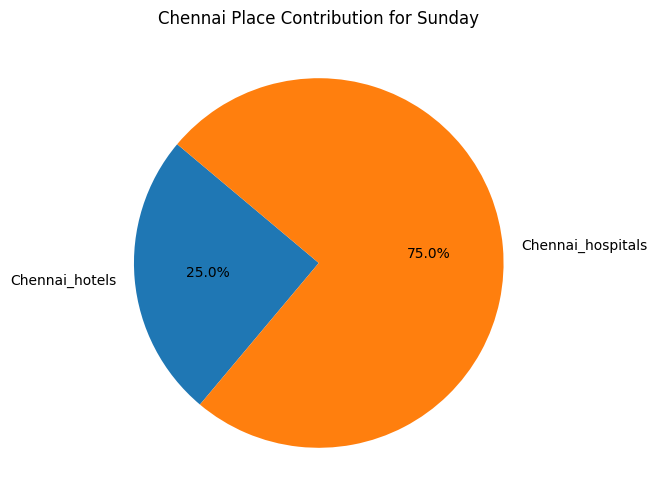

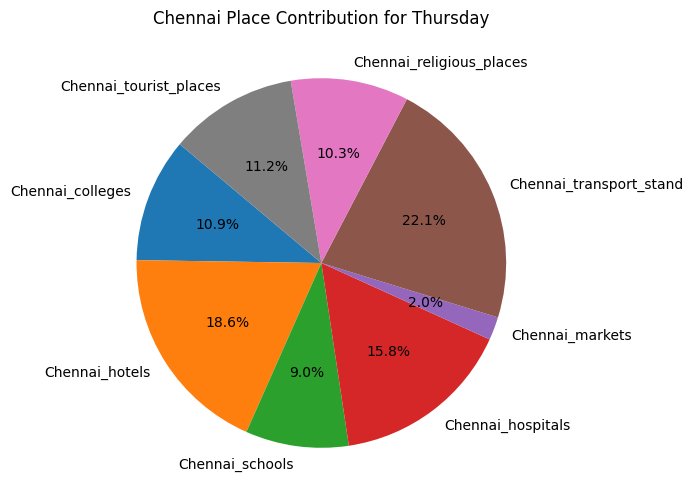

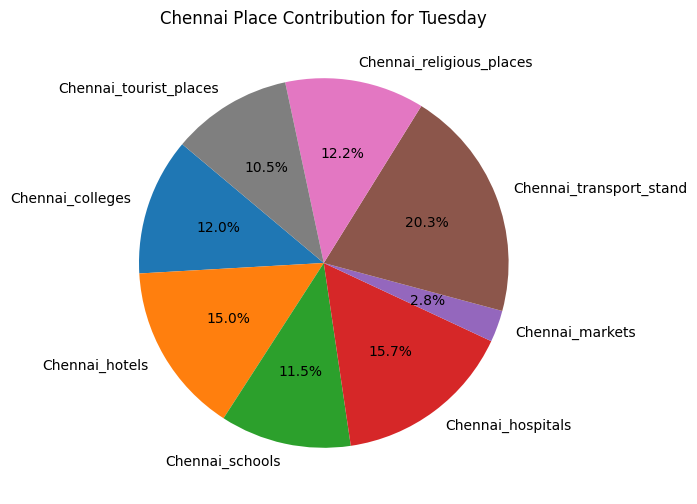

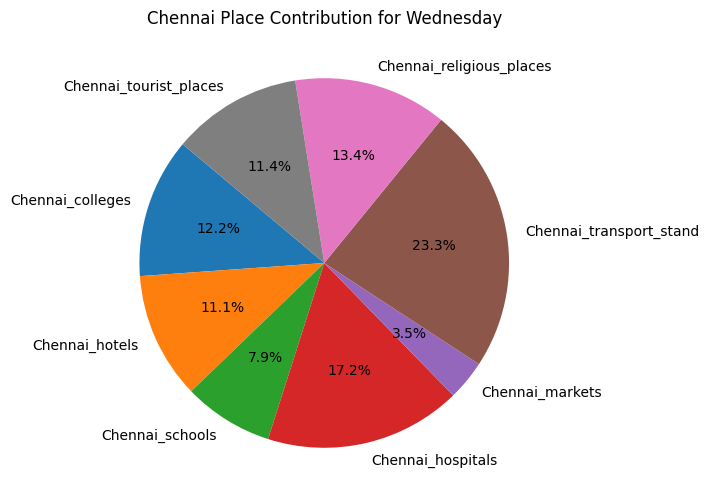

In [7]:


# Load your DataFrame from the CSV file
df = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\date basis\alert seperated data with concenteration of warning each weekday with chennai places\cas_ldw.csv")

# Drop the "Lat" and "Long" columns, as well as columns 'Count' and 'Avg_speed'
df = df.drop(["Lat", "Long", "Count", "Avg_speed"], axis=1)

# Group the data by 'Time_hour' and calculate the sum for each group
grouped_df = df.groupby('Weekday').sum()

# Calculate the total for each 'Time_hour' group
grouped_df['Total'] = grouped_df.sum(axis=1)

# Iterate through 'Time_hour' values and create pie charts only if any percentage is greater than 0
for time_hour, row in grouped_df.iterrows():
    chennai_places = row[:-1]  # Exclude the last column, which is the 'Total'
    total = row['Total']
    
    # Calculate percentages
    percentages = (chennai_places / total) * 100
    
    # Check if any percentage is greater than 0
    if any(percentages > 0):
        labels = [place for place, percentage in percentages.items() if percentage > 0]
        percentages = [percentage for percentage in percentages if percentage > 0]
        
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Chennai Place Contribution for {time_hour}")
        plt.show()


# Analyse speed data for this warning.

q1 =  49.0
mean_speed =  56.0
q3 =  58.0
No of alerts below q1 =  1664
No of alerts >= q1 but < mean_speed  =  1850
No of alerts >= mean_speed but < q3  =  2525
No of alerts greater than q3 =  392
No of alerts above mean =  2917
No of alerts below mean =  3514


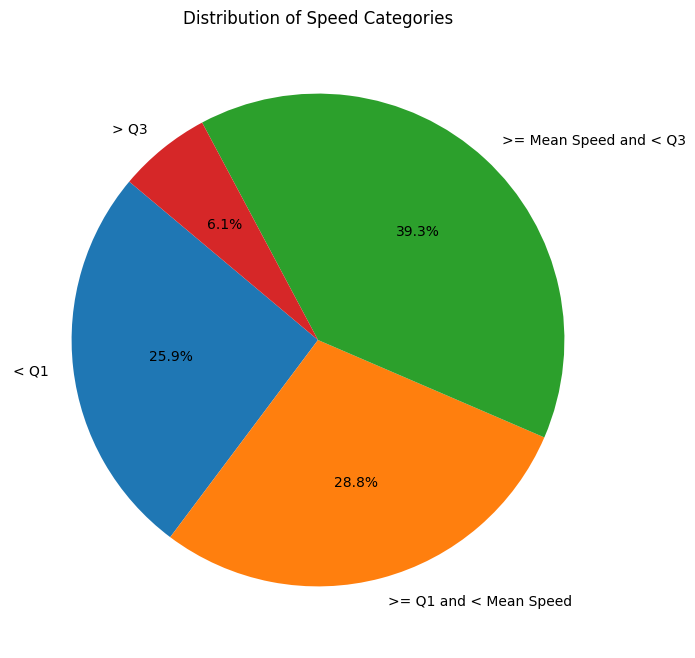

In [8]:
df=pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\Data seperated on alert\cas_ldw.csv")

mean_speed=np.median(df["Speed"])
q1=np.percentile(df["Speed"],25)
q3=np.percentile(df["Speed"],75)
print("q1 = ",q1)
print("mean_speed = ",mean_speed)
print("q3 = ",q3)
d1=df[df["Speed"]<=q1].shape
print("No of alerts below q1 = " ,d1[0])
d2=df[(df["Speed"]>q1) & (df["Speed"]<=mean_speed)].shape
print("No of alerts >= q1 but < mean_speed  = " ,d2[0])
d3=df[(df["Speed"]>mean_speed) & (df["Speed"]<=q3)].shape
print("No of alerts >= mean_speed but < q3  = " ,d3[0])
d4=df[df["Speed"]>q3].shape
print("No of alerts greater than q3 = " ,d4[0])
print("No of alerts above mean = ",(d3[0]+d4[0]))
print("No of alerts below mean = ",(d1[0]+d2[0]))


# Create a list of labels for the categories
categories = ["< Q1", ">= Q1 and < Mean Speed", ">= Mean Speed and < Q3", "> Q3"]

# Create a list of data points in each category
data = [d1[0], d2[0], d3[0], d4[0]]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Speed Categories")
plt.show()


speed is too high this clearly shows majority of warning is on highway.

## seperate data and see where speed is more and less.

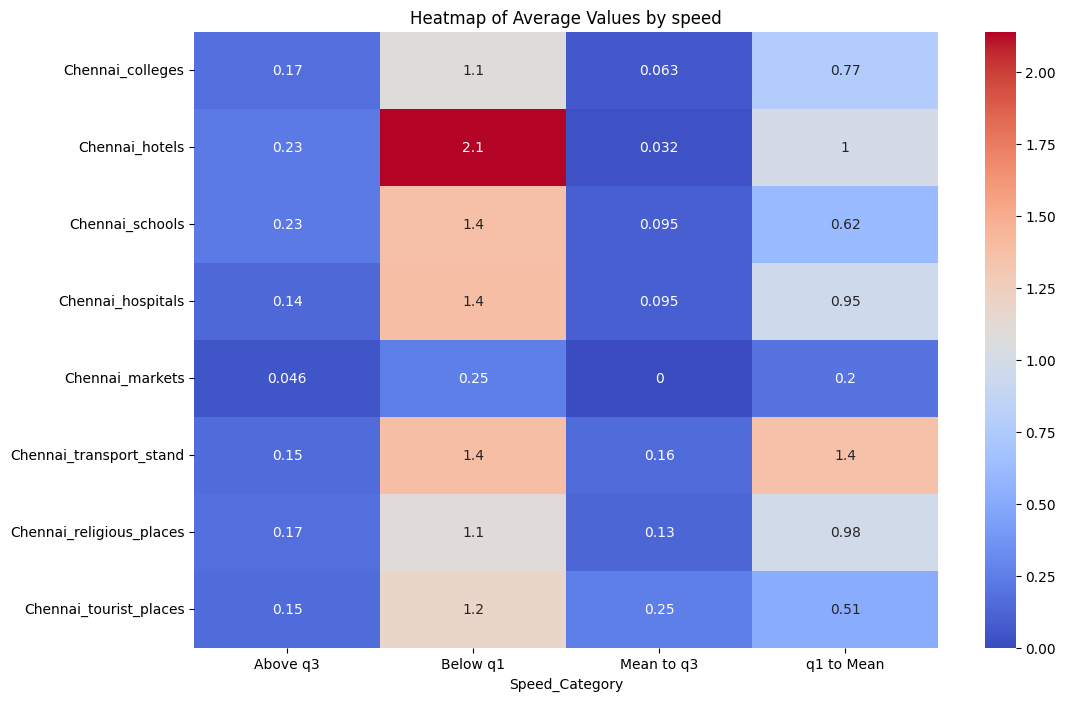

In [9]:
df1 = pd.read_csv(r"D:\Jupyter lab\unnati_phase1_data\alert density basis\alert high density points with places count\cas_ldw.csv")

# Drop the "Lat" and "Long" columns, as well as columns 'Count'
df1 = df1.drop(["Lat", "Long", "Count"], axis=1)

# Calculate percentiles for df1 (assuming you want to perform calculations on df1)
mean_speed = np.median(df1["Avg_speed"])
q1 = np.percentile(df1["Avg_speed"], 25)
q3 = np.percentile(df1["Avg_speed"], 75)

# Create groups based on conditions for df1
def speed_category(speed):
    if speed < q1:
        return "Below q1"
    elif speed >= q1 and speed <= mean_speed:
        return "q1 to Mean"
    elif speed >= mean_speed and speed <= q3:
        return "Mean to q3"
    else:
        return "Above q3"

df1['Speed_Category'] = df1['Avg_speed'].apply(speed_category)
# Group the data by 'Time_hour' and calculate the mean for each group
grouped_df = df1.groupby('Speed_Category').mean()
grouped_df=grouped_df.drop(["Avg_speed"],axis=1)
# Transpose the DataFrame to have 'Time_hour' on the y-axis
grouped_df = grouped_df.T


# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_df, annot=True, cmap="coolwarm")

# Set the title
plt.title("Heatmap of Average Values by speed")

# Show the plot
plt.show()

below q1 speed more conc. of areas where peoples live i.e. closer to chennai places.
from q1 to mean its relatively most probbably theses are the areas which link highway and cities roads etc check by filtering these result of speed total and check on map.
mean to q3 clearly shows that 56-58 can be the speed when alert are comming on highway. just filter it once and c heck on map.